In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib notebook

## 1) Explore the dataset

In [58]:
dataset=pd.read_csv('FlightDelays.csv')
LE = LabelEncoder()
dataset['Flight Status'] = LE.fit_transform(dataset['Flight Status'])
dataset.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,1
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,1
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,1
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,1
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,1


In [59]:
dataset.isnull().describe()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
count,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201
unique,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201


#### Checking dataset  prediction  feature spread

1    1773
0     428
Name: Flight Status, dtype: int64


<IPython.core.display.Javascript object>


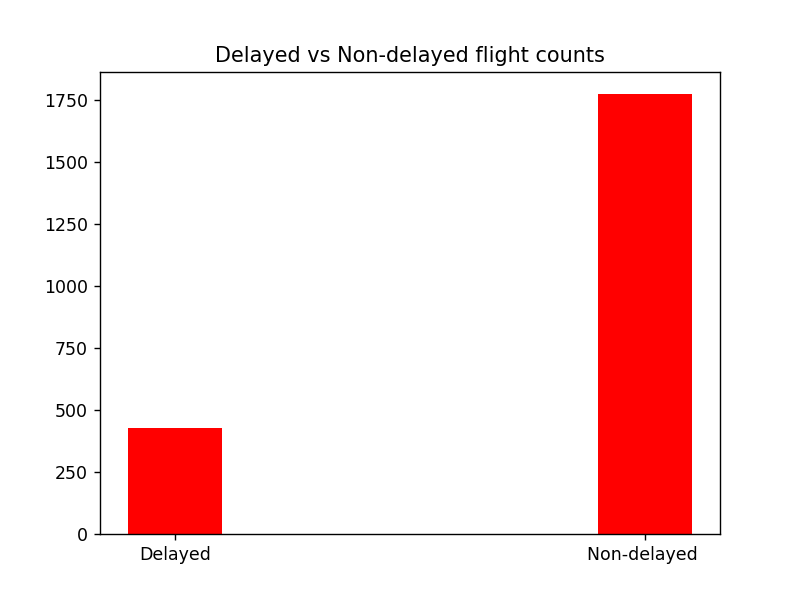

In [60]:
#histogram
print(dataset['Flight Status'].value_counts())
fig = plt.figure()
x = ["Delayed", "Non-delayed "]
status = [428,1773]
plt.bar(x,status,0.2,color = 'Red')
plt.title("Delayed vs Non-delayed flight counts")
plt.show()

In [61]:
428/1773

0.24139875916525663

0    32
Name: Flight Status, dtype: int64


<IPython.core.display.Javascript object>


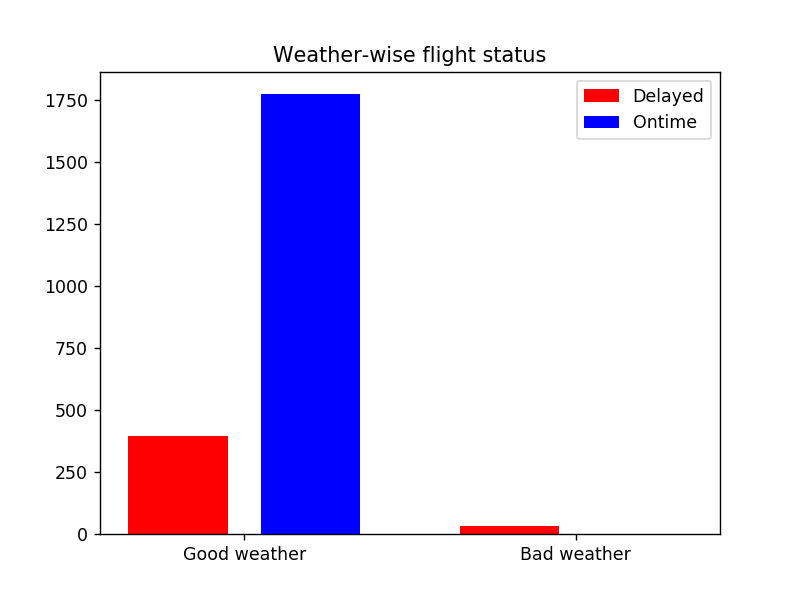

In [62]:
#histogram
print(dataset[dataset['Weather'] == 1]['Flight Status'].value_counts())
x = ["Good weather" , "Bad weather"]
delayed_weather = [396,32]
ontime_weather = [1773,0]
X_actual = np.arange(len(x))

fig = plt.figure()
plt.bar(X_actual,delayed_weather,0.3,label = 'Delayed',color = 'Red')
plt.bar(X_actual+0.4,ontime_weather,0.3,label = 'Ontime',color = 'Blue')
plt.legend()
plt.title('Weather-wise flight status')
plt.xticks(X_actual+0.2,x)
plt.show()

Percentage of ontime flights: 
[75.14 76.96 91.34 87.89 72.88 72.34 83.87 86.67]


<IPython.core.display.Javascript object>


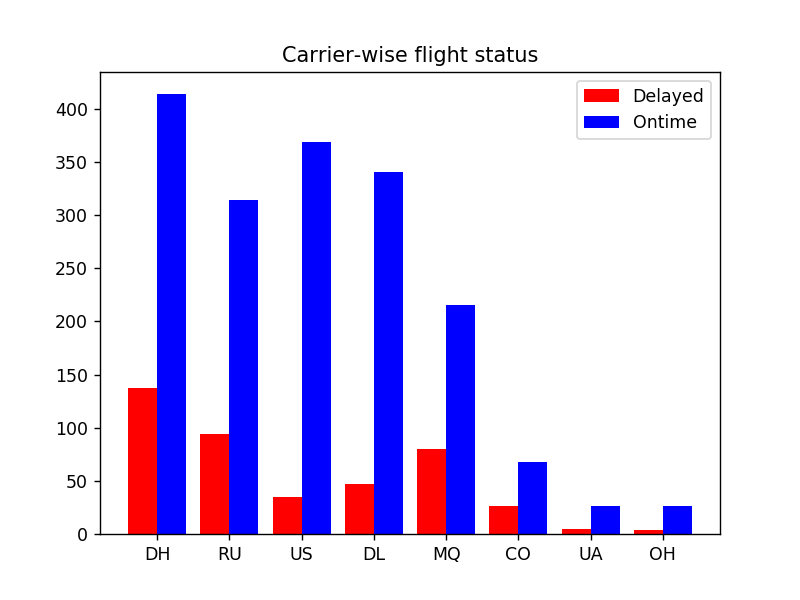

In [63]:
# print(dataset['CARRIER'].value_counts())
x = ["DH","RU","US","DL","MQ","CO","UA","OH"]
# print(dataset[dataset['CARRIER'] == 'OH']['Flight Status'].value_counts())
delayed_carrier  = np.array([137,94,35,47,80,26,5,4])
ontime_carrier = np.array([414,314,369,341,215,68,26,26])

X_actual = np.arange(len(x))

print(f'Percentage of ontime flights: \n{np.round(ontime_carrier*100/(delayed_carrier+ontime_carrier),2)}')

fig = plt.figure()
plt.bar(X_actual,delayed_carrier,0.4,label = 'Delayed',color = 'Red')
plt.bar(X_actual+0.4,ontime_carrier,0.4,label = 'Ontime',color = 'Blue')
plt.legend()
plt.title('Carrier-wise flight status')
plt.xticks(X_actual+0.2,x)
plt.show()

Percentage of ontime flights: 
[84.09 75.79 78.24]


<IPython.core.display.Javascript object>


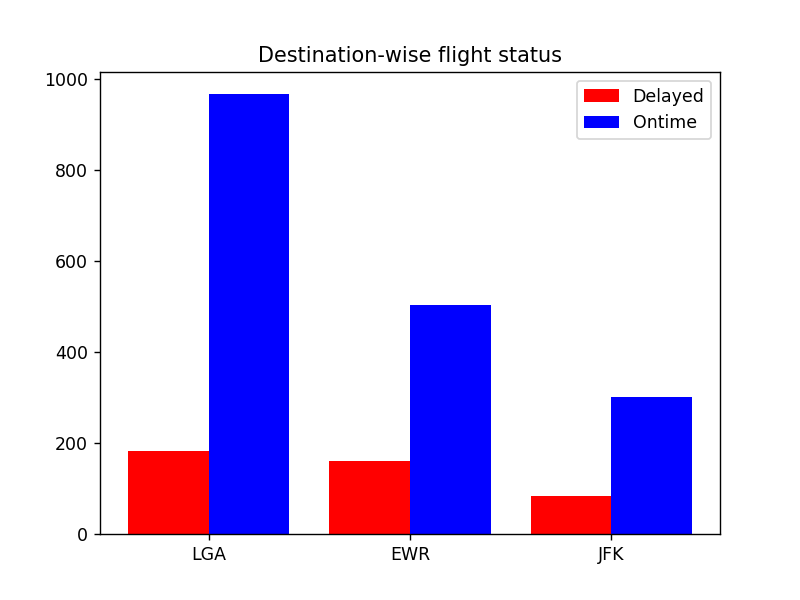

In [64]:
# print(dataset['DEST'].value_counts())
x = ["LGA","EWR","JFK"]
# print(dataset[dataset['DEST'] == 'JFK']['Flight Status'].value_counts())
delayed_carrier  = np.array([183,161,84])
ontime_carrier = np.array([967,504,302])

print(f'Percentage of ontime flights: \n{np.round(ontime_carrier*100/(delayed_carrier+ontime_carrier),2)}')

X_actual = np.arange(len(x))

fig = plt.figure()
plt.bar(X_actual,delayed_carrier,0.4,label = 'Delayed',color = 'Red')
plt.bar(X_actual+0.4,ontime_carrier,0.4,label = 'Ontime',color = 'Blue')
plt.legend()
plt.title('Destination-wise flight status')
plt.xticks(X_actual+0.2,x)
plt.show()

Percentage of ontime flights: 
[74.48 83.87 75.22]


<IPython.core.display.Javascript object>


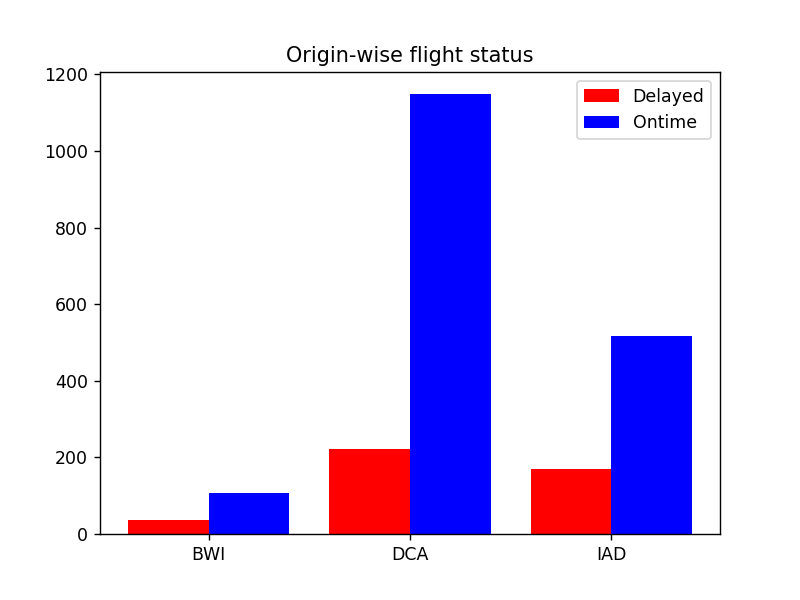

In [65]:
# print(dataset['ORIGIN'].value_counts())
x = ["BWI","DCA","IAD"]
# print(dataset[dataset['ORIGIN'] == 'IAD']['Flight Status'].value_counts())
delayed_carrier  = np.array([37,221,170])
ontime_carrier = np.array([108,1149,516])

print(f'Percentage of ontime flights: \n{np.round(ontime_carrier*100/(delayed_carrier+ontime_carrier),2)}')

X_actual = np.arange(len(x))

fig = plt.figure()
plt.bar(X_actual,delayed_carrier,0.4,label = 'Delayed',color = 'Red')
plt.bar(X_actual+0.4,ontime_carrier,0.4,label = 'Ontime',color = 'Blue')
plt.legend()
plt.title('Origin-wise flight status')
plt.xticks(X_actual+0.2,x)
plt.show()

Percentage of ontime flights: 
[72.73 78.05 82.19 84.68 80.82 90.4  73.12]


<IPython.core.display.Javascript object>


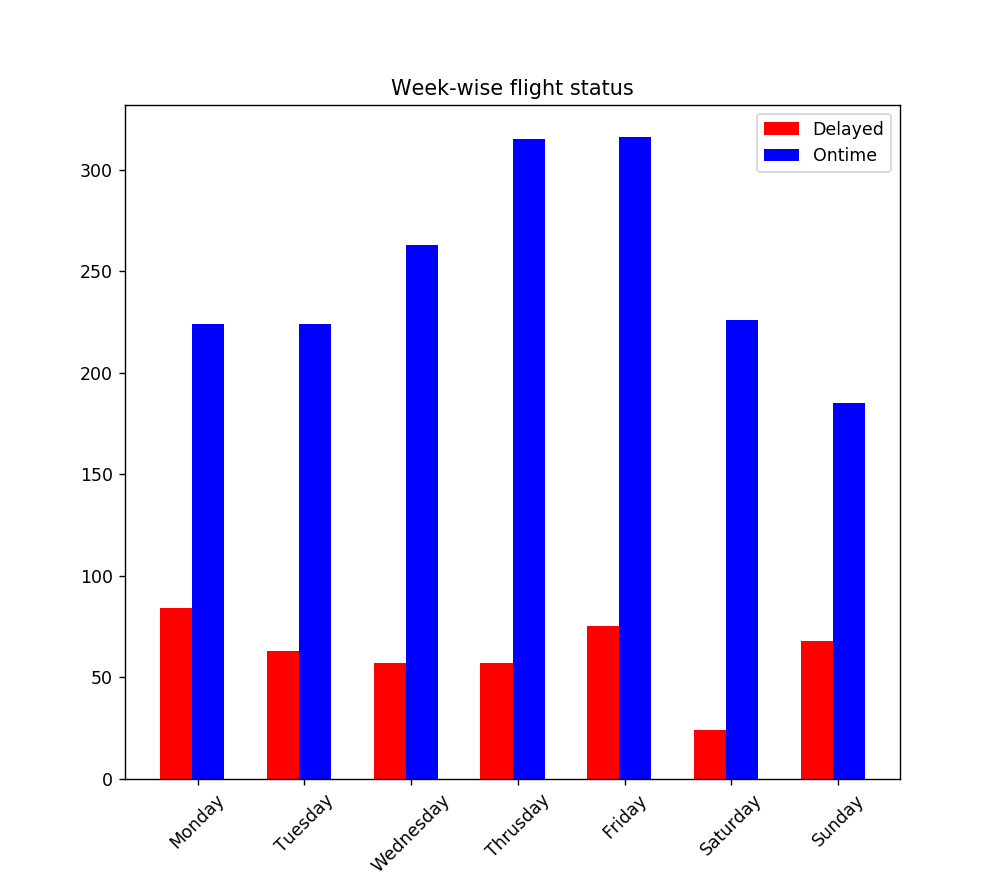

In [66]:
# print(dataset['DAY_WEEK'].value_counts())
x = [1,2,3,4,5,6,7]
# print(dataset[dataset['DAY_WEEK'] == 7]['Flight Status'].value_counts())
delayed_carrier  = np.array([84,63,57,57,75,24,68])
ontime_carrier = np.array([224,224,263,315,316,226,185])

print(f'Percentage of ontime flights: \n{np.round(ontime_carrier*100/(delayed_carrier+ontime_carrier),2)}')

X_actual = np.arange(len(x))

fig = plt.figure(figsize=(8,7))
plt.bar(X_actual,delayed_carrier,0.3,label = 'Delayed',color = 'Red')
plt.bar(X_actual+0.3,ontime_carrier,0.3,label = 'Ontime',color = 'Blue')
plt.legend()
plt.title('Week-wise flight status')
plt.xticks(X_actual+0.2,['Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday','Sunday'],rotation = 45)
plt.savefig('Daywise.png')
plt.show()

<IPython.core.display.Javascript object>


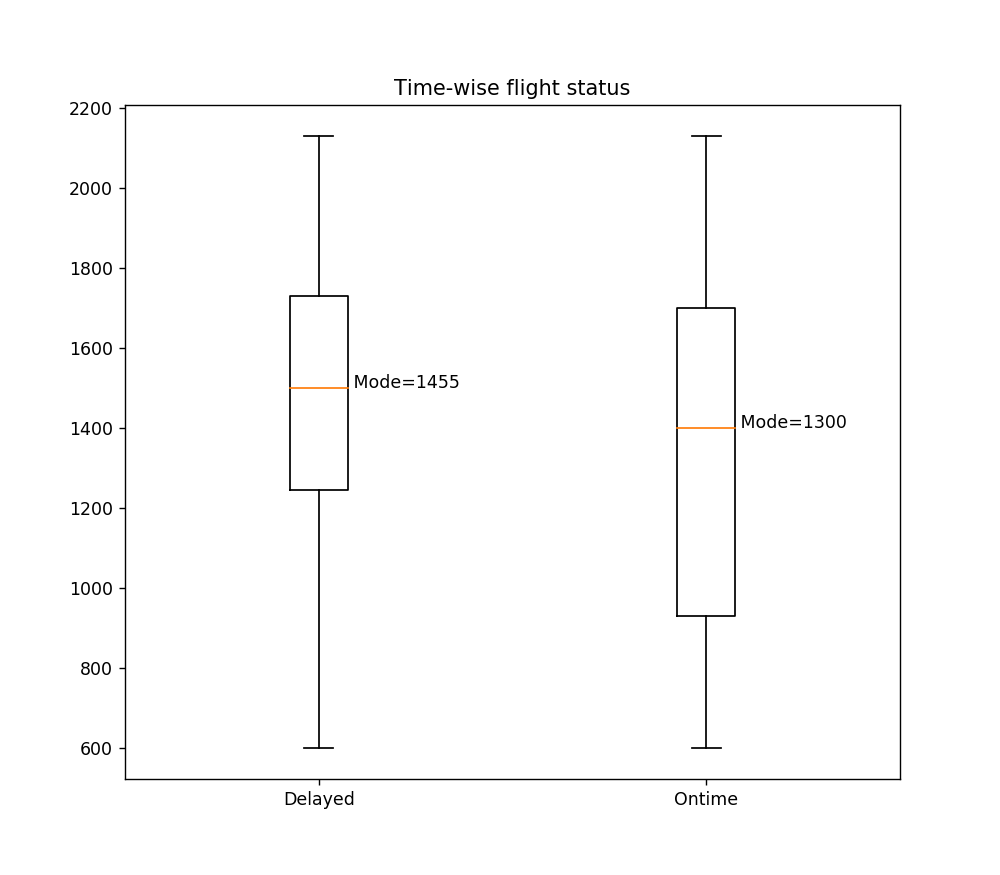

In [69]:
dataset[dataset['Flight Status'] == 1]['CRS_DEP_TIME']

fig = plt.figure(figsize=(8,7))
bp = plt.boxplot([dataset[dataset['Flight Status'] == 0]['CRS_DEP_TIME'],dataset[dataset['Flight Status'] == 1]['CRS_DEP_TIME']]\
            ,positions = [0,1])
m = [dataset[dataset['Flight Status'] == 0]['CRS_DEP_TIME'].mode(),dataset[dataset['Flight Status'] == 1]['CRS_DEP_TIME'].mode()]

for i, line in enumerate(bp['medians']):
    x, y = line.get_xydata()[1]
    text = ' Mode={}'.format(int(m[i]))
    plt.annotate(text, xy=(x, y))
plt.xticks([0,1],["Delayed","Ontime"])


plt.title('Time-wise flight status')


plt.show()

#### Checking  feature importance By pairplot

In [12]:
# fig = plt.figure(figsize = (10,10))
# sns.pairplot(dataset,hue="Flight Status")
# plt.savefig("Flight_Pairplot.png")

In [13]:
dataset.columns

Index(['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE',
       'FL_NUM', 'ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH', 'TAIL_NUM',
       'Flight Status'],
      dtype='object')

##  2) Preprocess the dataset & logistic model

### Converting ordinal data into numerical data
CARRIER = 'OH', 'DH', 'DL', 'MQ', 'UA', 'US', 'RU', 'CO'

ORIGIN = 'BWI', 'DCA', 'IAD'

DEST = 'JFK', 'LGA', 'EWR'

In [14]:
le = LabelEncoder()
dataset['TAIL_NUM'] = le.fit_transform(dataset['TAIL_NUM'])

Finaldataset = pd.get_dummies(dataset.drop(['FL_DATE'],axis =1 ), columns = ['CARRIER', 'DEST','ORIGIN'], prefix=['CARRIER', 'DEST','ORIGIN'])
Finaldataset.head()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,CARRIER_CO,...,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,DEST_EWR,DEST_JFK,DEST_LGA,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD
0,1455,1455,184,5935,0,4,1,525,1,0,...,1,0,0,0,0,1,0,1,0,0
1,1640,1640,213,6155,0,4,1,262,1,0,...,0,0,0,0,0,1,0,0,1,0
2,1245,1245,229,7208,0,4,1,381,1,0,...,0,0,0,0,0,0,1,0,0,1
3,1715,1709,229,7215,0,4,1,349,1,0,...,0,0,0,0,0,0,1,0,0,1
4,1039,1035,229,7792,0,4,1,384,1,0,...,0,0,0,0,0,0,1,0,0,1


<IPython.core.display.Javascript object>


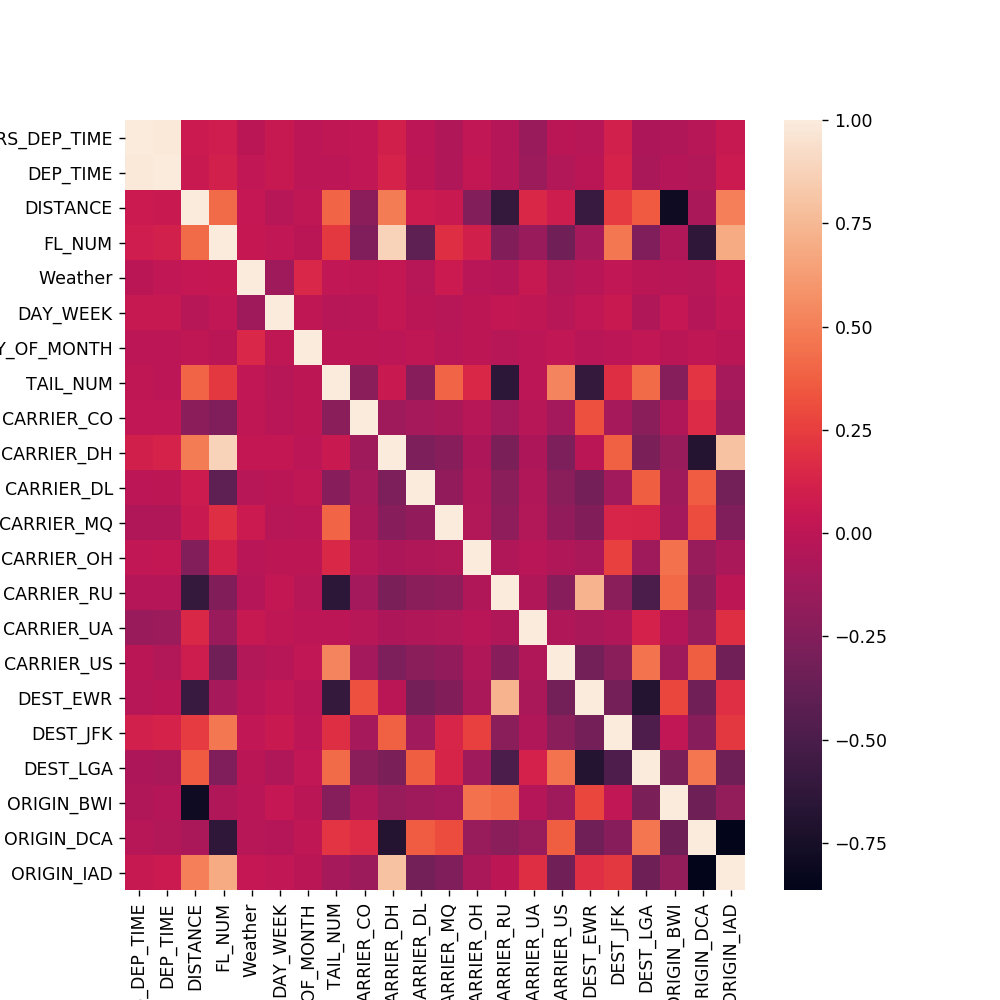

<function matplotlib.pyplot.show(*args, **kw)>

In [35]:
heatmapdf = Finaldataset.drop(['Flight Status'],axis =1).corr()
fig = plt.figure(figsize = (8,8))
sns.heatmap(heatmapdf)
fig.savefig("heatmaps.png")
plt.show

In [15]:
# Finaldataset['CRS_DEP_TIME'] = [ int(str(0)+ str(time)[:-2]) + int(str(time)[-2:])/60 for time in Finaldataset['CRS_DEP_TIME']]
# Finaldataset['DEP_TIME'] = [int(str(0) + str(time)[:-2]) + int(str(time)[-2:])/60 for time in Finaldataset['DEP_TIME']]
# Finaldataset['diff_DEP_TIME'] = Finaldataset['CRS_DEP_TIME'] - Finaldataset['DEP_TIME']
# Finaldataset.head(5)

In [16]:
def Logistic_Regression(xtrain,xtest,ytrain,ytest):
    model = LogisticRegression(random_state=0, max_iter = 1000)
    model.fit(xtrain,ytrain)
    predictions = model.predict(xtest)
    accuracy = confusion_matrix(ytest,predictions)
    print(model.coef_ )
    print(model.intercept_)
    print(confusion_matrix(predictions,ytest))    
    print(accuracy_score(ytest,predictions))
    return model.coef_[0] 

In [17]:
x_total = Finaldataset.drop(['Flight Status'],axis =1).values
# x_weather = Finaldataset[['Weather','DEP_TIME']].values
y = Finaldataset['Flight Status'].values
print(y)

[1 1 1 ... 1 1 1]


In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x_total,y,test_size=0.4,random_state=42)

np.unique(ytest, return_counts=True)

(array([0, 1]), array([163, 718], dtype=int64))

In [39]:
coefficents = Logistic_Regression(xtrain,xtest,ytrain,ytest)

[[ 2.33547624e-02 -2.38798577e-02  1.20100562e-02  3.25403237e-05
  -3.53247567e-01  8.67940981e-02 -2.42270253e-02 -9.21671045e-04
  -2.19414236e-01  8.82986215e-02  5.00421414e-01 -5.41132084e-01
   2.17313079e-01 -1.95271576e-01 -1.04554645e-02  1.99933405e-01
  -3.11049834e-01  2.88397552e-01  6.23454405e-02  3.08893980e-01
   1.97197437e-03 -2.71172796e-01]]
[0.03977438]
[[ 75   2]
 [ 88 716]]
0.8978433598183881


## 3) Interpret the model and coefficients and present some insights.

In [56]:
columns = Finaldataset.drop(['Flight Status'],axis =1).columns

importancedict = {}
for weight,col in zip(coefficents,columns):
    importancedict.update({abs(round(weight,3)) :[col,weight]})

pd.DataFrame(dict(sorted(importancedict.items(),reverse=True)).values(),columns=["Feature", "Weight"])

,Feature,Weight
0,CARRIER_MQ,-0.541132
1,CARRIER_DL,0.500421
2,Weather,-0.353248
3,DEST_EWR,-0.311050
4,ORIGIN_BWI,0.308894
5,DEST_JFK,0.288398
6,ORIGIN_IAD,-0.271173
7,CARRIER_CO,-0.219414
8,CARRIER_OH,0.217313
9,CARRIER_US,0.199933


In [47]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

ANS = In the Report

In [ ]:
#https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

In [ ]:
1. Lasso Regularizer
2. time interval(for 10 intervals time)
